In [1]:
from __future__ import division
import numpy as np
import pickle
from collections import defaultdict, Counter
from itertools import chain, combinations
from random import seed, shuffle
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

from preprocess_classification_datasets import load_preprocessed_classification_data, preprocess_all_datasets
from classification import train_classifier, make_predictions, calculate_evaluation_metrics, characterize_mistakes_per_rating, characterize_mistakes_per_worker
from consensus import calculate_concensus

In [2]:
DATA_FOLDER = "../data/"

In [3]:
def print_table(results):
    table_text = ""
    table_text += "Rating"
    for key in sorted(results):
        table_text += " & {}".format(key)
    table_text += "\\\\\n"

    titles = ["Total num", "Fraction Misclassified", "Avg Prob Correct Class", "Std Of Prob Correct Class"]
    keys = ["num_instances", "frac_misclassified", "avg_prob", "std_prob"]

    for i, title in enumerate(titles):
        table_text += "{}".format(title)
        for key in sorted(results):
            table_text += " & {}".format(results[key][keys[i]])
        table_text += "\\\\\n"

    print(table_text)

In [4]:
def print_cdf(results):
    for i, j in results:
        print("{}, {}".format(i, round(j, 2)))

In [5]:
def demo():
    frac_train = 0.5
    random_seed = 560
    dataset_prefix = "AMT" # choose between "AMT", "AMT_wo_neutral", "SSI", "SSI_wo_neutral"
    data_subset = "test" # choose between "all", "train", "test"
    features = ['volitionality', 'reliability', 'privacy', 'relevance', 'causes_outcome', 'caused_by_sensitive_feature', 'causal_loop', 'causes_disparity_in_outcomes']
    control_features = ["fairness", "worker"]

    # load preprocessed dataset
    preprocess_all_datasets()
    data = load_preprocessed_classification_data(dataset_prefix, show_preview=False)


    # CLASSIFICATION
    # train & evaluate classifiers
    accuracy_cv, auc_cv = list(), list()
    for i in range(0, 5):
        random_seed -= 1
        # train classifier
        clsfr = train_classifier(data, features, control_features, frac_train=frac_train, random_seed=random_seed)    
        # make predictions
        ground_truth, predicted, predicted_prob, fairness_control, worker_control = make_predictions(clsfr, data, "test", features, control_features, frac_train=frac_train, random_seed=random_seed)    
        ## accuracy & auc
        accuracy, auc = calculate_evaluation_metrics(ground_truth, predicted)
        accuracy_cv.append(accuracy)
        auc_cv.append(auc)

    print("Average accuracy: ", np.average(np.array(accuracy_cv)))
    print("Average AUC: ", np.average(np.array(auc_cv)))

    # characterize misclassifications
    ## evaluate on whole data
    ground_truth, predicted, predicted_prob, fairness_control, worker_control = make_predictions(clsfr, data, "all", features, control_features, frac_train=frac_train, random_seed=random_seed)    
    
    ## missclassifications per fairness rating
    rating_mistakes = characterize_mistakes_per_rating(ground_truth, predicted, predicted_prob, fairness_control)
    print("\n\nCharacterize misclassifications per fairness rating\n")
    print_table(rating_mistakes)

    ## misclassifications per worker
    print("\n\nCharacterize misclassifications per worker (CDF)\n")
    worker_mistakes_cdf = characterize_mistakes_per_worker(ground_truth, predicted, worker_control)
    print_cdf(worker_mistakes_cdf)


    # CONSENSUS
    clsfr = train_classifier(data, features, control_features, frac_train=frac_train, random_seed=555)
    ground_truth, predicted, predicted_prob, fairness_control, worker_control = make_predictions(clsfr, data, "all", features, control_features, frac_train=frac_train, random_seed=random_seed)    
    data["predicted_fairness"] = predicted
    concensus = calculate_concensus(data)

In [6]:
def main():
    demo()
         
    
if __name__=="__main__":
    main()

Average accuracy:  0.8989795918367347
Average AUC:  0.8974442441239316


Characterize misclassifications per fairness rating

Rating & 1 & 2 & 3 & 4 & 5 & 6 & 7\\
Total num & 391 & 249 & 195 & 136 & 321 & 280 & 388\\
Fraction Misclassified & 0.06 & 0.16 & 0.36 & 0.32 & 0.08 & 0.04 & 0.01\\
Avg Prob Correct Class & 0.89 & 0.75 & 0.58 & 0.61 & 0.81 & 0.9 & 0.97\\
Std Of Prob Correct Class & 0.19 & 0.25 & 0.28 & 0.29 & 0.2 & 0.15 & 0.08\\



Characterize misclassifications per worker (CDF)

0.0, 0.0
0.1, 0.0
0.2, 0.01
0.3, 0.01
0.4, 0.01
0.5, 0.02
0.6, 0.06
0.7, 0.12
0.8, 0.29
0.9, 0.6
1.0, 1.0
########TEST TEST TEST START########
<class 'dict'>
########TEST TEST TEST END########





printing consensus on fairness

&  & \multicolumn{9}{c|}{\textbf{Probability distribution over answers}} & \multicolumn{2}{c}{\textbf{Consensus}} \\
\textbf{Feature} & \textbf{Mean fairness} & \textbf{1} & \textbf{2} & \textbf{3} & \textbf{1-3} & \textbf{4} & \textbf{5-7} & \textbf{5} & \textbf{6} & \textbf{

# Pilot Survey 1

In [7]:
import pandas as pd
#!pip install plot-likert
import plot_likert

In [8]:
replace_values = {1:'Strongly Disagree', \
                  2:'Disagree', \
                  3:'Slightly Disagree', \
                  4:'Neither Agree nor Disagree',\
                  5:'Slightly Agree', \
                  6:'Agree', \
                  7:'Strongly Agree'}   
    
# define my selections
myscale1 = ['Strongly Disagree', 
             'Disagree',
             'Slightly Disagree',
             'Neither Agree nor Disagree',
             'Slightly Agree',
             'Agree',
             'Strongly Agree']

In [9]:
fr_data = pd.read_csv(r'/Users/nursatkakon/Library/CloudStorage/OneDrive-TUNI.fi/23_Spring 2023/DATA.ML.381 Fairness in Big Data Management/Fairness in BDM/project_code/data/fr_data.csv')
len(fr_data)

98

In [10]:
fr_data

,worker_id,fairness__the_criminal_history_of_the_defendant's_family_and_friends,fairness__the_defendant's_beliefs_about_criminality,fairness__the_defendant's_criminal_history,fairness__the_defendant's_current_criminal_charge,fairness__the_defendant's_education_and_behavior_in_school,fairness__the_defendant's_history_of_substance_abuse,fairness__the_defendant's_personality,fairness__the_quality_of_the_defendant's_social_life_and_free_time,fairness__the_safety_of_the_neighborhood_the_defendant_lives_in,...,pos_volitionality__the_criminal_history_of_the_defendant's_family_and_friends,pos_volitionality__the_defendant's_beliefs_about_criminality,pos_volitionality__the_defendant's_criminal_history,pos_volitionality__the_defendant's_current_criminal_charge,pos_volitionality__the_defendant's_education_and_behavior_in_school,pos_volitionality__the_defendant's_history_of_substance_abuse,pos_volitionality__the_defendant's_personality,pos_volitionality__the_quality_of_the_defendant's_social_life_and_free_time,pos_volitionality__the_safety_of_the_neighborhood_the_defendant_lives_in,pos_volitionality__the_stability_of_the_defendant's_employment_and_living_situation
0,0,1,1,6,6,1,1,4,1,1,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
1,1,3,3,7,7,3,5,2,1,1,...,NaN,NaN,0.0,0.0,NaN,1.0,NaN,NaN,NaN,0.0
2,2,3,2,5,5,2,7,3,5,5,...,NaN,NaN,0.0,1.0,NaN,0.0,NaN,0.0,1.0,0.0
3,3,2,1,7,6,1,6,3,4,2,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0
4,4,2,5,7,7,2,5,1,2,3,...,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,4,7,7,7,1,5,3,1,1,...,0.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0
94,94,1,1,7,7,1,1,1,1,1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
95,95,1,2,6,5,1,2,3,1,1,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
96,96,1,3,5,6,2,4,2,1,2,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [11]:
fr_data2 = fr_data.iloc[:, 1:11]
#fr_data2

In [12]:
for i in list((fr_data2.columns)):                                                                                        
    # Replace multiple values
    fr_data2 = fr_data2.replace({i: replace_values}) 
#fr_data2

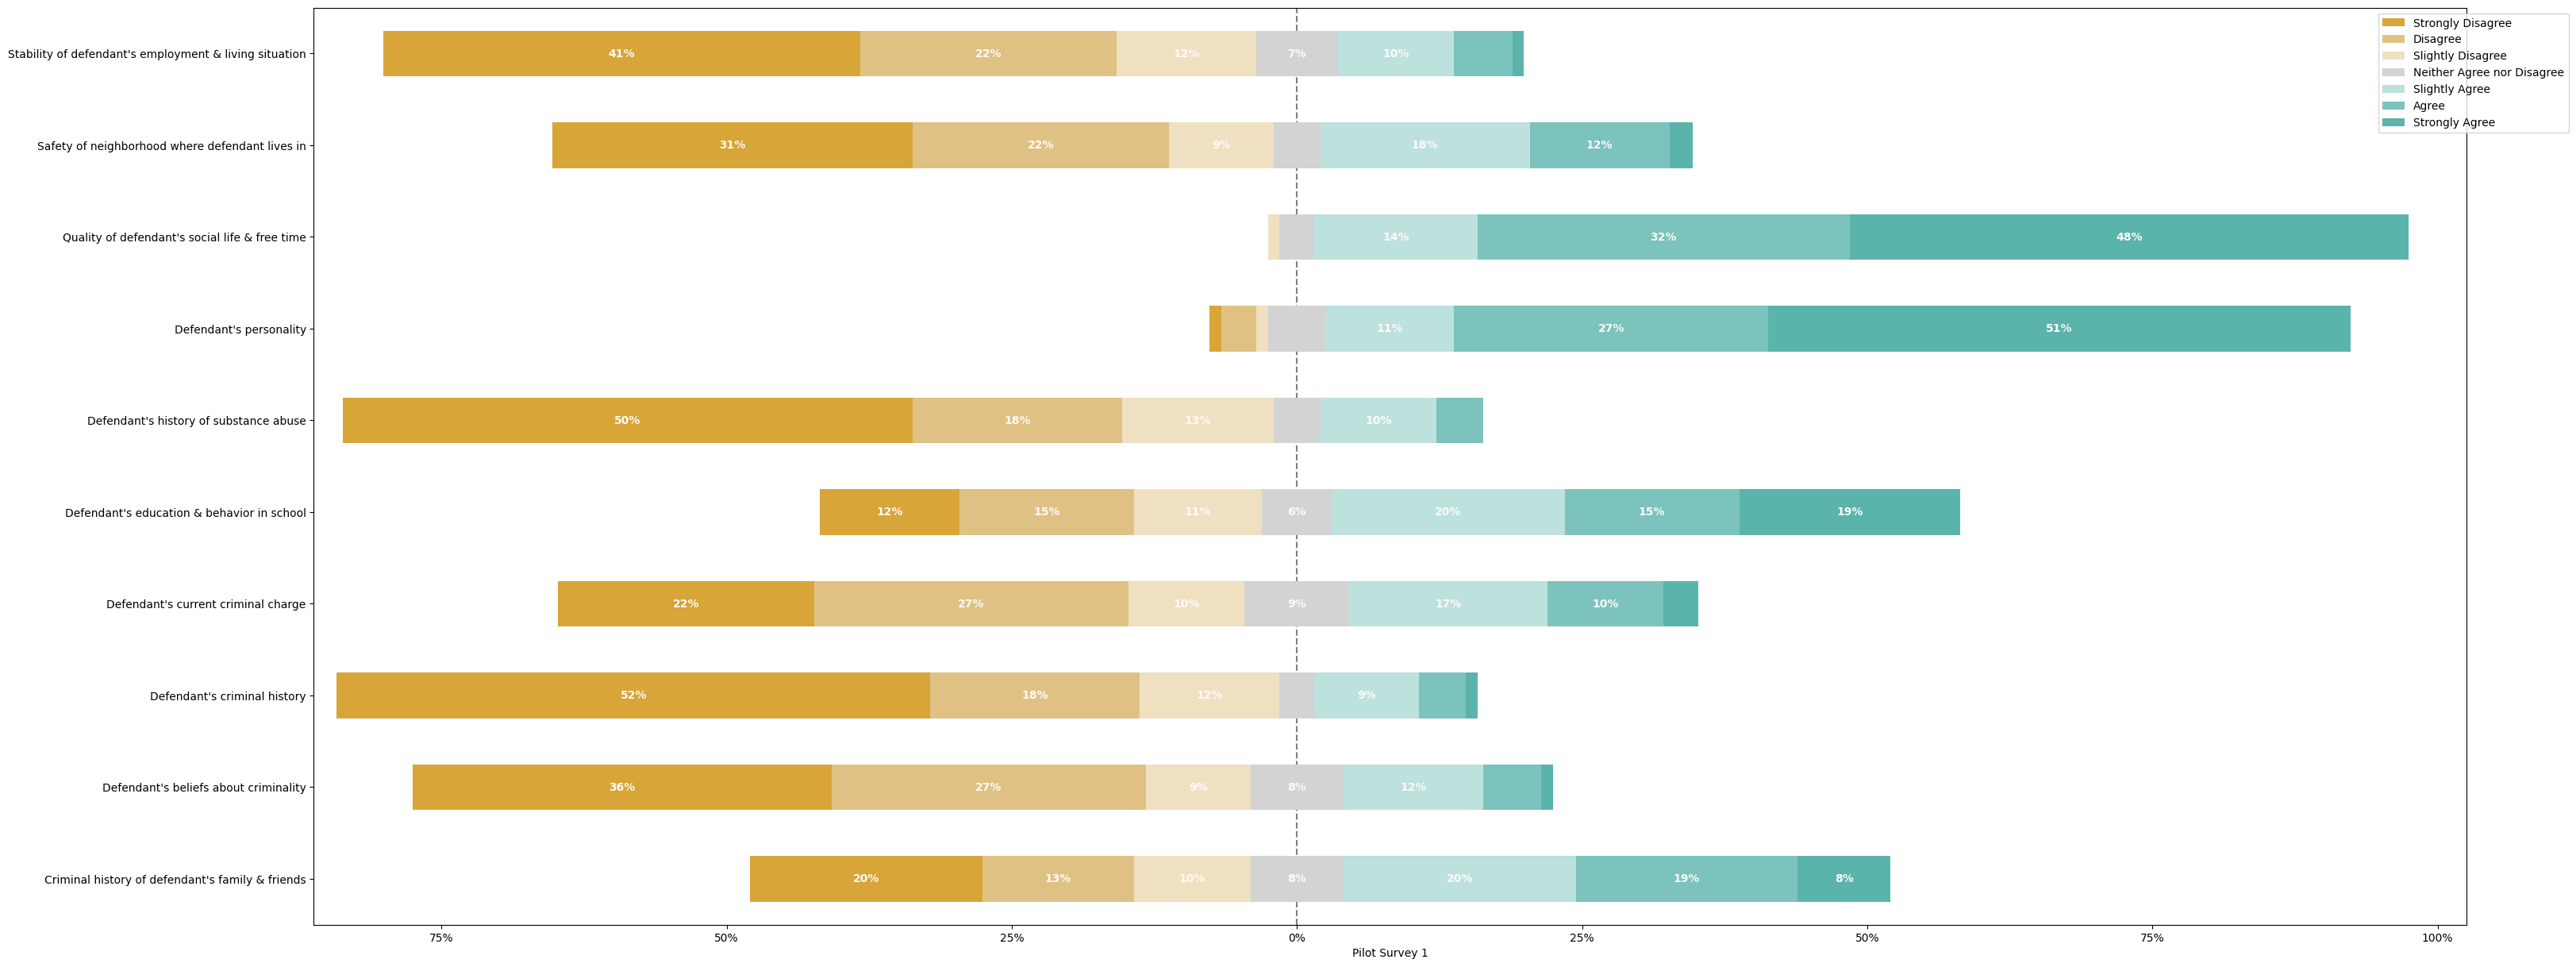

In [13]:


# create a likert plot
ax = plot_likert.plot_likert(fr_data2, myscale1, plot_percentage=True, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.likert7)
ax.figure.set_size_inches(35, 15)
ax.xaxis.set_label_text('Pilot Survey 1');
ax.set_yticklabels(["Criminal history of defendant's family & friends", \
                    "Defendant's beliefs about criminality", \
                    "Defendant's criminal history", \
                    "Defendant's current criminal charge", \
                    "Defendant's education & behavior in school", \
                    "Defendant's history of substance abuse", \
                    "Defendant's personality", \
                    "Quality of defendant's social life & free time", \
                    "Safety of neighborhood where defendant lives in", \
                    "Stability of defendant's employment & living situation"\
                   ]);

ax.get_figure().savefig('pilot_survey_1_data.jpeg',dpi=600);



# Pilot Survey 2

In [14]:
ip_data = pd.read_csv(r'/Users/nursatkakon/Library/CloudStorage/OneDrive-TUNI.fi/23_Spring 2023/DATA.ML.381 Fairness in Big Data Management/Fairness in BDM/project_code/data/ip_data.csv')
len(ip_data.columns)
#ip_data.info()
#list(ip_data.columns)

81

In [15]:
ip_data

,worker_id,causal_loop__the_criminal_history_of_the_defendant's_family_and_friends,causal_loop__the_defendant's_beliefs_about_criminality,causal_loop__the_defendant's_criminal_history,causal_loop__the_defendant's_current_criminal_charge,causal_loop__the_defendant's_education_and_behavior_in_school,causal_loop__the_defendant's_history_of_substance_abuse,causal_loop__the_defendant's_personality,causal_loop__the_quality_of_the_defendant's_social_life_and_free_time,causal_loop__the_safety_of_the_neighborhood_the_defendant_lives_in,...,volitionality__the_criminal_history_of_the_defendant's_family_and_friends,volitionality__the_defendant's_beliefs_about_criminality,volitionality__the_defendant's_criminal_history,volitionality__the_defendant's_current_criminal_charge,volitionality__the_defendant's_education_and_behavior_in_school,volitionality__the_defendant's_history_of_substance_abuse,volitionality__the_defendant's_personality,volitionality__the_quality_of_the_defendant's_social_life_and_free_time,volitionality__the_safety_of_the_neighborhood_the_defendant_lives_in,volitionality__the_stability_of_the_defendant's_employment_and_living_situation
0,0,7,1,5,5,3,5,6,3,5,...,2,7,1,1,1,1,7,7,7,7
1,1,7,4,4,4,5,7,5,4,6,...,2,3,1,5,1,1,3,4,5,5
2,2,7,3,7,6,5,5,5,5,2,...,1,5,3,3,3,3,2,6,1,2
3,3,7,5,5,4,4,5,5,4,4,...,2,6,1,2,1,1,3,5,6,7
4,4,7,7,7,5,5,5,5,7,7,...,5,7,7,6,3,7,6,7,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,6,3,5,2,5,5,2,3,6,...,2,5,2,3,3,3,6,5,2,5
96,96,7,5,6,4,7,6,6,7,6,...,1,5,1,1,1,1,2,2,2,2
97,97,4,2,5,4,4,3,3,3,6,...,3,3,6,5,2,4,4,2,4,5
98,98,2,4,2,4,2,2,2,2,3,...,1,5,4,1,1,2,3,7,2,6


In [16]:
ip_data_current_criminal_charge = ip_data.filter(regex='_current_criminal_charge')
ip_data_current_criminal_charge.columns
ip_data_current_criminal_charge.head()

for i in list((ip_data_current_criminal_charge.columns)):                                                                                       
    # Replace multiple values
    ip_data_current_criminal_charge = ip_data_current_criminal_charge.replace({i: replace_values}) 
    

ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('causal_loop', 'Causes vicious cycle')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('caused_by_sensitive_feature', 'Caused by sensitive group membership')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('causes_disparity_in_outcomes', 'Causes disparity in outcomes')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('causes_outcome_', 'Causes outcome')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('privacy', 'Privacy_')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('relevance', 'Relevance')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('reliability', 'Reliability')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace('volitionality', 'Volitionality')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace("_the_defendant's_current_criminal_charge", '')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace("__", '')
ip_data_current_criminal_charge.columns = ip_data_current_criminal_charge.columns.str.replace("_", '')
ip_data_current_criminal_charge.head()

,Causes vicious cycle,Caused by sensitive group membership,Causes disparity in outcomes,Causes outcome,Privacy,Relevance,Reliability,Volitionality
0,Slightly Agree,Disagree,Slightly Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree
1,Neither Agree nor Disagree,Agree,Slightly Agree,Neither Agree nor Disagree,Slightly Disagree,Agree,Slightly Disagree,Slightly Agree
2,Agree,Slightly Agree,Slightly Agree,Agree,Strongly Disagree,Strongly Agree,Agree,Slightly Disagree
3,Neither Agree nor Disagree,Slightly Agree,Neither Agree nor Disagree,Agree,Neither Agree nor Disagree,Agree,Agree,Disagree
4,Slightly Agree,Disagree,Strongly Agree,Agree,Disagree,Strongly Agree,Slightly Disagree,Agree


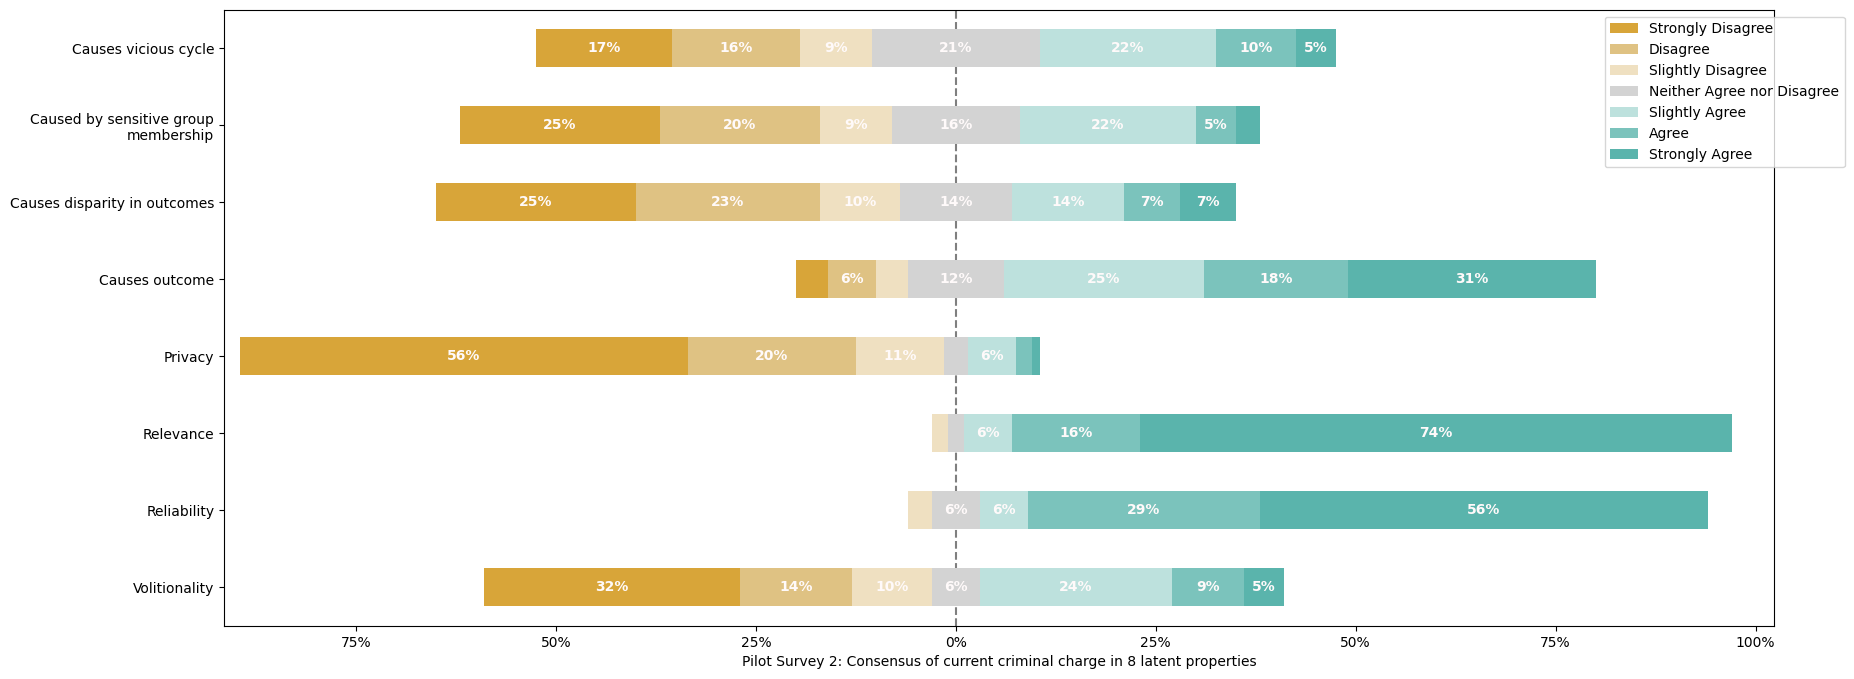

In [17]:
# create a likert plot
ax = plot_likert.plot_likert(ip_data_current_criminal_charge, myscale1, plot_percentage=True, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.likert7)
ax.figure.set_size_inches(20, 8)
ax.xaxis.set_label_text('Pilot Survey 2: Consensus of current criminal charge in 8 latent properties');
ax.get_figure().savefig('pilot_survey_2_current_criminal_charge.jpeg',dpi=600);

# Main Survey (Samples)

In [18]:
main_survey_sample = pd.read_csv('main_survey_sample.csv', sep = ';', header = 0) 
main_survey_sample = main_survey_sample.apply(lambda x: x.str.replace(',','.'))
main_survey_sample['AMT'] = main_survey_sample['AMT'].astype(float)
main_survey_sample['SSI'] = main_survey_sample['SSI'].astype(float)
main_survey_sample['Census'] = main_survey_sample['Census'].astype(float)
main_survey_sample.dtypes
main_survey_sample

,type,Demographic,AMT,SSI,Census
0,gender,Male,0.55,0.44,0.49
1,gender,Female,0.43,0.55,0.51
2,race,African American,0.09,0.12,0.13
3,race,Asian,0.03,0.04,0.06
4,race,Caucasian,0.76,0.71,0.61
5,race,Hispanic,0.08,0.11,0.18
6,race,Other,0.02,0.02,0.04
7,education,<B.S.,0.47,0.68,0.70
8,education,B.S.+,0.51,0.32,0.30
9,political,Liberal,0.57,0.37,0.33


In [19]:
gender = main_survey_sample[main_survey_sample['type']== 'gender'] 
gender = gender.drop(['type'], axis=1)
gender

,Demographic,AMT,SSI,Census
0,Male,0.55,0.44,0.49
1,Female,0.43,0.55,0.51


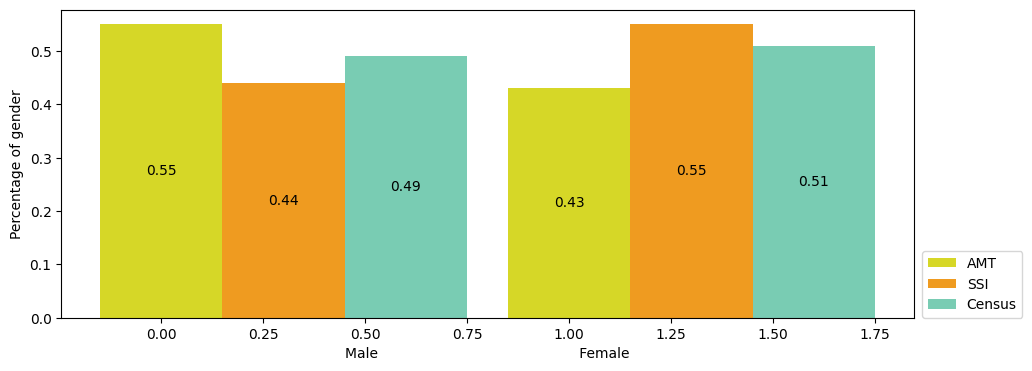

In [20]:
import matplotlib.pyplot as plt

AMT = gender['AMT'].values.tolist()
SSI = gender['SSI'].values.tolist()
Census = gender['Census'].values.tolist()

fig, ax = plt.subplots()
ax.figure.set_size_inches(11, 4)
n=2
r = np.arange(n)
width = 0.30

p1= plt.bar(r, AMT, 
        color = ['#d6d727'],
        width = width,
        label='AMT')
p2 = plt.bar(r + width, SSI, 
        color = ["#ef9b20"],
        width = width,
        label='SSI')
p3 = plt.bar(r + width + width, Census, 
        color = ['#79ccb3'],
        width = width,
        label='Census')

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')
  
plt.ylabel("Percentage of gender")   
plt.xlabel("Male                                              Female")  
plt.legend(loc=(1.01, 0))
plt.show()

ax.get_figure().savefig('main_survey_sample_gender.jpeg' ,dpi=600);

In [21]:
race = main_survey_sample[main_survey_sample['type']== 'race'] 
race = race.drop(['type'], axis=1)
race = race.set_index('Demographic')
race.index.names = ['Race']
#race = race.rename(columns = {'Demographic':'Race'}, inplace = True)
race

,AMT,SSI,Census
Race,,,
African American,0.09,0.12,0.13
Asian,0.03,0.04,0.06
Caucasian,0.76,0.71,0.61
Hispanic,0.08,0.11,0.18
Other,0.02,0.02,0.04


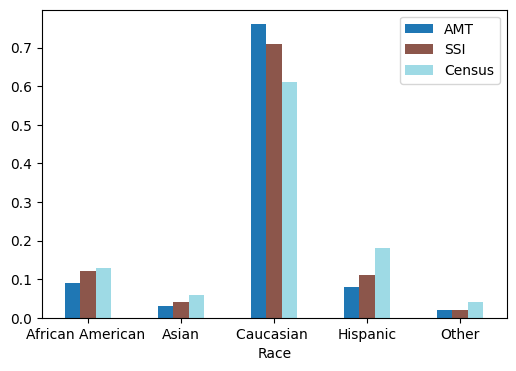

In [22]:
ax = race.plot(kind='bar',figsize=(6,4), rot = 0, colormap = 'tab20')
ax.get_figure().savefig('main_survey_sample_race.jpeg' ,dpi=600);

In [23]:
edu = main_survey_sample[main_survey_sample['type']== 'education'] 
edu = edu.drop(['type'], axis=1)
edu = edu.set_index('Demographic')
edu.index.names = ['Education']
edu

,AMT,SSI,Census
Education,,,
<B.S.,0.47,0.68,0.7
B.S.+,0.51,0.32,0.3


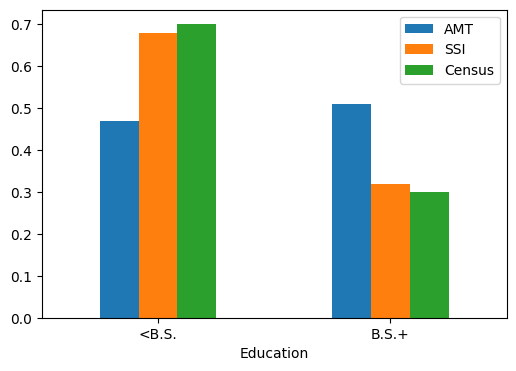

In [24]:
ax = edu.plot(kind='bar',figsize=(6,4), rot = 0)
ax.get_figure().savefig('main_survey_sample_edu.jpeg' ,dpi=600);

In [25]:
politic = main_survey_sample[main_survey_sample['type']== 'political'] 
politic = politic.drop(['type'], axis=1)
politic = politic.set_index('Demographic')
politic.index.names = ['Political Leaning']
politic

,AMT,SSI,Census
Political Leaning,,,
Liberal,0.57,0.37,0.33
Conservative,0.17,0.24,0.29
Moderate,0.21,0.33,0.34
Other,0.05,0.06,0.04


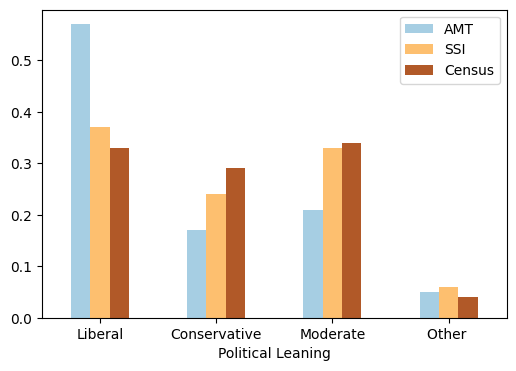

In [26]:
ax = politic.plot(kind='bar',figsize=(6,4), rot = 0, colormap = 'Paired')
ax.get_figure().savefig('main_survey_sample_politic.jpeg' ,dpi=600);